In [3]:
import gym
import numpy as np

from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env

import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader

import matplotlib.pyplot as plt

from mlp import *
from feedback_env import *
from learning import *

In [4]:
# Setup configs for reward and policy learning

reward_cfg = {
    'n_sample': 1000,
    'n_epoch': 40,
    'lr': 0.001,
    'verbose': False,
    'eval_freq': 100,
    'batch_size': 256,
    'split': 0.8,
    'log': False,
    'action_dim': 2,
    'layers': [25, 25, 25]
}

policy_cfg = {
    'timesteps': 25000,
    'verbose': False,
    'algo': 'ppo', # not used atm
    'log': False,
    'action_dim': 2
}

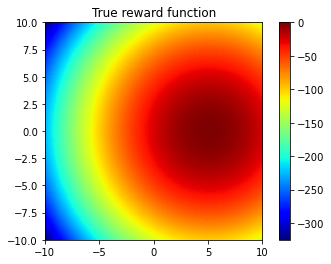

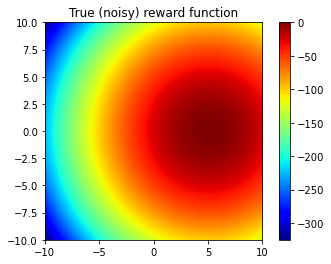

In [5]:
## Feedback loop

iterations = 1

# Create comparison function
f = lambda x: -(x[0]-5)**2
g = lambda x: -(x[1]-0)**2
sigma_f, sigma_g = 0.0, 0.0
reward_fn_true = lambda x : f(x) + g(x)
reward_fn_true_noisy = create_reward_fn(f, g, sigma_f, sigma_g)
comparison_fn = create_comparison_fn(f, g, sigma_f, sigma_g)

# Initialize random sampler
sample = lambda n: (None, [np.random.uniform(-10, 10, size=(2,)) for _ in range(n)])

# Plot true reward function
visualize_fn(reward_fn_true, title="True reward function", x_range=[-10,10], y_range=[-10,10], x_step=0.1, y_step=0.1)
visualize_fn(reward_fn_true_noisy, title="True (noisy) reward function", x_range=[-10,10], y_range=[-10,10], x_step=0.1, y_step=0.1)

In [6]:
comparisons_data = None
samples = {}
reward_fns = {}

for i in range(iterations):
    print("Iteration", i)
    # Learn reward function from samples and feedback from comparison function
    reward_fn, comparisons_data = learn_reward(sample, comparison_fn, reward_cfg=reward_cfg, prev_comparisons=comparisons_data)
    
    # Train policy on reward function and return sampler
    # sample = train_policy(reward_fn, policy_cfg=policy_cfg)

    # Store sampler and reward function
    # samples[i] = sample
    reward_fns[i] = reward_fn


Iteration 0


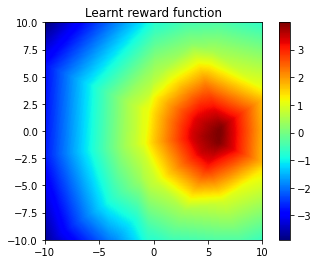

In [ ]:
visualize_fn(reward_fns[0], title="Learnt reward function", x_range=[-10,10], y_range=[-10,10], x_step=0.1, y_step=0.1)

In [ ]:
arg_max, max_val = None, None
for x in np.arange(-10,10,0.1):
    for y in np.arange(-10,10,0.1):
        val = reward_fns[0]([x,y])
        if max_val is None or val > max_val:
            arg_max = [x, y]
            max_val = val
print(arg_max, max_val)
print(reward_fns[0]([5,0]))

[5.999999999999943, -0.4000000000000341] 3.9864764
3.773511
